In [1]:
# pca

In [2]:
from sklearn import datasets
import numpy as np

In [4]:
iris = datasets.load_iris()
R = np.array(iris.data)

In [6]:
R.shape

(150, 4)

In [7]:
# numpy has an API to calculate a covariance matrix
# y-axes will be used for calculation
R_cov = np.cov(R, rowvar=False)

# print the covariance matrix
import pandas as pd
iris_covmat = pd.DataFrame(data=R_cov, columns=iris.feature_names)
iris_covmat.index = iris.feature_names
iris_covmat

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.685694,-0.042434,1.274315,0.516271
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639
petal length (cm),1.274315,-0.329656,3.116278,1.295609
petal width (cm),0.516271,-0.121639,1.295609,0.581006


In [10]:
# calculate the eigenvalues and eigenvectors
eig_values, eig_vectors = np.linalg.eig(R_cov)

# print eig_value nad vector
print(eig_values)
print("...")
print(eig_vectors)


[4.22824171 0.24267075 0.0782095  0.02383509]
...
[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [12]:
featureVector = eig_vectors[:,:2]

In [13]:
featureVector

array([[ 0.36138659, -0.65658877],
       [-0.08452251, -0.73016143],
       [ 0.85667061,  0.17337266],
       [ 0.3582892 ,  0.07548102]])

In [14]:
featureVector_t = np.transpose(featureVector)

# R is the original iris dataset
R_t = np.transpose(R)

newDataset_t = np.matmul(featureVector_t, R_t)
newDataset = np.transpose(newDataset_t)

# check the shape of new reduced 2D dataset
newDataset.shape

(150, 2)

### 2.1 Experiment run on Iris data

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target

np.random.seed(5)
# Default test value is 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y)

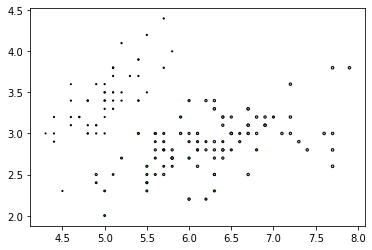

In [53]:
plt.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')
plt.show()

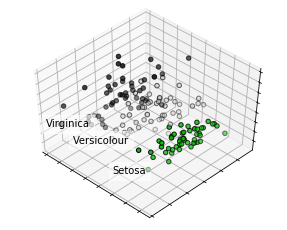

In [35]:
fig = plt.figure(1, figsize=(4,3))
plt.clf()
pca = decomposition.PCA(n_components=3)
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
pca.fit(X)
X = pca.transform(X)
for name, label in ('Setosa', 0), ('Versicolour', 1), ('Virginica', 2):
    ax.text3D(X[y==label, 0].mean(),
              X[y==label, 1].mean() + 1.5,
              X[y==label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
y = np.choose(y,[1, 2, 0]).astype(np.float)
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

### Standardization

In [54]:
from sklearn import preprocessing
import numpy as np
X_train = np.array( [[ 1., -1.,  2.],
                     [ 2.,  0.,  0.],
                     [ 0.,  1., -1.]])

In [55]:
X_scaled = preprocessing.scale(X_train)

In [57]:
# zero mean
sum(sum(X_scaled))

0.0

In [58]:
# mean as 0
X_scaled.mean()

4.9343245538895844e-17

In [59]:
# 1 as the variance
X_scaled.std()

1.0

In [68]:
# StandardScaler that implements the Transformer API to compute the mean
# and standard deviation on a training set so as to be able to later reapply
# the same transformation on the testing set

scaler = preprocessing.StandardScaler().fit(X_train)

In [69]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [70]:
scaler.mean_

array([1.        , 0.        , 0.33333333])

In [71]:
scaler.scale_

array([0.81649658, 0.81649658, 1.24721913])

In [72]:
scaler.transform(X_train)

array([[ 0.        , -1.22474487,  1.33630621],
       [ 1.22474487,  0.        , -0.26726124],
       [-1.22474487,  1.22474487, -1.06904497]])

In [73]:
X_test = [[-1., 1., 0.]]

In [74]:
scaler.transform(X_test)

array([[-2.44948974,  1.22474487, -0.26726124]])

### Scaling features to a range

In [75]:
# An alternative standardization is scaling features to lie between a given minimum and maximum value
# often between zero and one entries in sparse data

In [76]:
X_train = np.array([[ 1., -1.,  2.],
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

In [77]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.5       , 0.        , 1.        ],
       [1.        , 0.5       , 0.33333333],
       [0.        , 1.        , 0.        ]])

In [78]:
# The same instance of the transformer can then be applied to some new test data unseen 
#during the fit call: 
# the same scaling and shifting operations will be applied to be consistent 
# with the transformation performed on the train data

In [79]:
X_test = np.array([[-3., -1., 4.]])
X_test_minmax = min_max_scaler.transform(X_test)
X_test_minmax

array([[-1.5       ,  0.        ,  1.66666667]])